In [1]:
#import libraries

from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time

In [2]:
#Create list to store the scraped data

authors = []
dates = []
statements = []
sources = []
targets = []


In [3]:
# Create a function to scrape the website

def scrape_website(page_number):
    page_num = str(page_number)
    URL='https://www.politifact.com/factchecks/list/?page='+page_num
    webpage = requests.get(URL)
    soup= BeautifulSoup(webpage.text, 'html.parser')
    #Get the location of the informantion
    statement_footer = soup.find_all('footer', attrs={'class':'m-statement__footer'})  #Location of the author and the date
    statement_quote = soup.find_all('div', attrs={'class':'m-statement__quote'})   #Location of the statement
    statement_meta = soup.find_all('div', attrs={'class':'m-statement__meta'})  #Location of the source
    target = soup.find_all('div', attrs={'class':'m-statement__meter'})  #Location of the target (score card)


    #Loop through the statement_fotter

    for i in statement_footer:
        link1 = i.text.strip()
        name_and_date = link1.split()
        first_name = name_and_date[1]
        last_name = name_and_date[2]
        full_name = first_name +' '+ last_name
        month = name_and_date[4]
        day = name_and_date[5]
        year = name_and_date[6]
        date = month+ ' '+day+' '+ year
        dates.append(date)
        authors.append(full_name)
        #Loop through the statement_quote
        for i in statement_quote:
            link2= i.find_all('a')
            statement_text = link2[0].text.strip()
            statements.append(statement_text)
        #Loop through the meta
        for i in statement_meta:
            link3 = i.find_all('a')
            source_text = link3[0].text.strip()
            sources.append(source_text)
            #Loop through the target
        for i in target:
            link4 = i.find('div', attrs={'class':'c-image'}).find('img').get('alt')
            targets.append(link4)

In [4]:
#Loop through 'n-1' webpages to scrape the data
n=2
for i in range(1,n):
    scrape_website(i)

In [5]:
# #Create the dataframe
# data = pd.DataFrame(columns = ['author', 'statement', 'source', 'date', 'target'])
# data['author'] = authors
# data['statement'] = statements
# data['source']=sources
# data['date']=dates
# data['target']=targets
# #Show the data
# data

In [6]:

import pandas as pd

# Assuming you have lists: authors, statements, sources, dates, targets
# Ensure all lists have the same length

# Check lengths of lists
lengths = [len(authors), len(statements), len(sources), len(dates), len(targets)]

# Find the maximum length
max_length = max(lengths)

# Create a dictionary with lists as values and pad shorter lists with NaN
data_dict = {
    'author': authors + [None] * (max_length - len(authors)),
    'statement': statements + [None] * (max_length - len(statements)),
    'source': sources + [None] * (max_length - len(sources)),
    'date': dates + [None] * (max_length - len(dates)),
    'target': targets + [None] * (max_length - len(targets)),
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Show the data
data

,author,statement,source,date,target
0,Ciara O'Rourke,“Buttigieg praises cargo ship for helping dism...,Viral image,"March 29, 2024",false
1,Jill Terreri,"In New York, there are no barriers to law enfo...",Kathy Hochul,"• March 29,",barely-true
2,Grace Abels,“The Francis Scott Key bridge is the same brid...,Facebook posts,"March 29, 2024",false
3,Laura Schulte,“We’re facing situations these days where you ...,Tammy Baldwin,"March 29, 2024",true
4,Loreben Tuquero,"""Barco chino destruye imponente barco en Balti...",Facebook posts,"March 29, 2024",false
...,...,...,...,...,...
895,None,“The captain of the container ship Dali…is a U...,X posts,None,false
896,None,Says “100% of net job creation under the Biden...,J.D. Vance,None,barely-true
897,None,Transportation Secretary Pete Buttigieg blamed...,X posts,None,false
898,None,Footage shows explosion on Baltimore bridge.,Instagram posts,None,pants-fire


In [7]:
#Create a function to get a binary number from the target
def getBinaryNumTarget(text):
  if text == 'true':
    return 1
  else:
    return 0

In [8]:
#Create a function to get a binary label true(REAL) or false(FAKE) from the target
def getBinaryTarget(text):
  if text == 'true':
    return 'REAL'
  else:
    return 'FAKE'

In [9]:
#Create two new colums on the dataframe
data['BinaryTarget']= data['target'].apply(getBinaryTarget)
data['BinaryNumTarget']= data['target'].apply(getBinaryNumTarget)

In [10]:
#Show the data
data

,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,Ciara O'Rourke,“Buttigieg praises cargo ship for helping dism...,Viral image,"March 29, 2024",false,FAKE,0
1,Jill Terreri,"In New York, there are no barriers to law enfo...",Kathy Hochul,"• March 29,",barely-true,FAKE,0
2,Grace Abels,“The Francis Scott Key bridge is the same brid...,Facebook posts,"March 29, 2024",false,FAKE,0
3,Laura Schulte,“We’re facing situations these days where you ...,Tammy Baldwin,"March 29, 2024",true,REAL,1
4,Loreben Tuquero,"""Barco chino destruye imponente barco en Balti...",Facebook posts,"March 29, 2024",false,FAKE,0
...,...,...,...,...,...,...,...
895,None,“The captain of the container ship Dali…is a U...,X posts,None,false,FAKE,0
896,None,Says “100% of net job creation under the Biden...,J.D. Vance,None,barely-true,FAKE,0
897,None,Transportation Secretary Pete Buttigieg blamed...,X posts,None,false,FAKE,0
898,None,Footage shows explosion on Baltimore bridge.,Instagram posts,None,pants-fire,FAKE,0


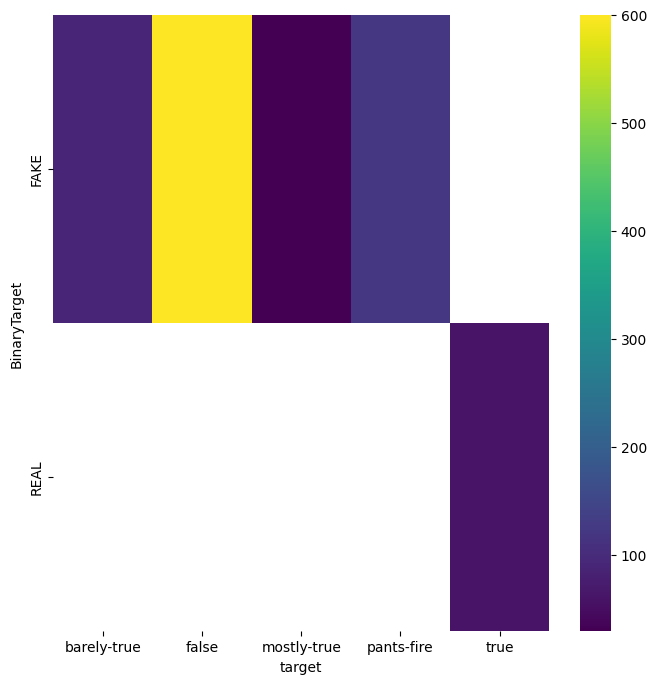

In [11]:
# @title target vs BinaryTarget

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BinaryTarget'].value_counts()
    for x_label, grp in data.groupby('target')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('target')
_ = plt.ylabel('BinaryTarget')

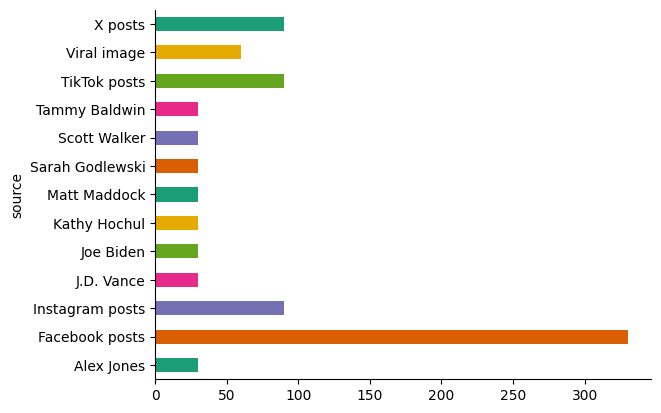

In [12]:
# @title source

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='target', ylabel='count'>

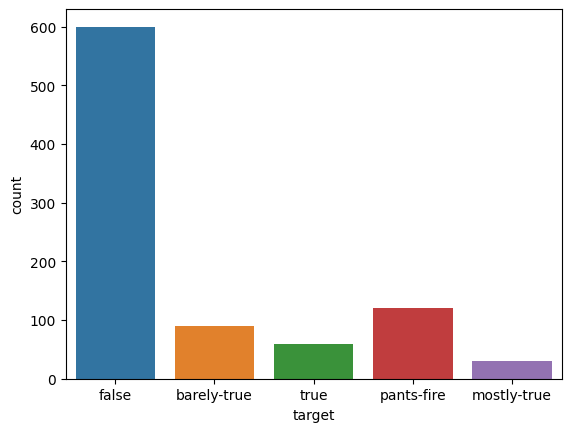

In [13]:
# @title Statement count per target

sns.countplot(x="target", data=data)

In [14]:
#Store the data to a CSV File
data.to_csv('political_fact_checker.csv')

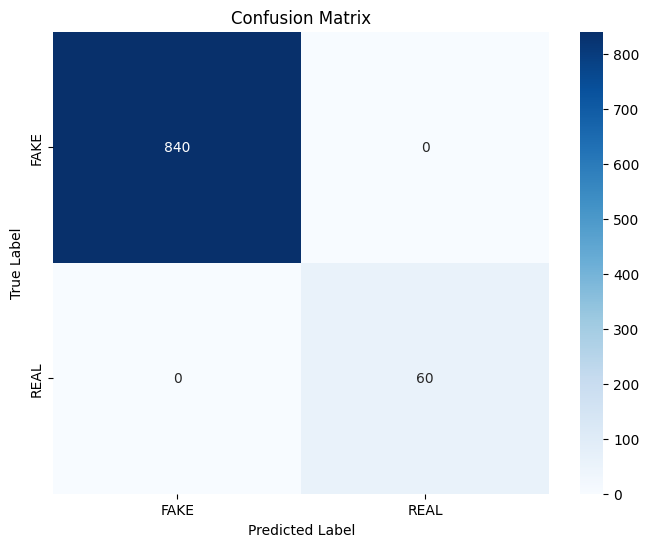

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a ground truth dataset named 'ground_truth' with columns 'BinaryNumTarget'
# Replace 'ground_truth.csv' with the actual file path if needed
ground_truth = pd.read_csv('political_fact_checker.csv')

# Merge the predicted labels with the ground truth based on the index
merged_data = pd.merge(data, ground_truth, left_index=True, right_index=True)

# Extract the actual and predicted labels
actual_labels = merged_data['BinaryNumTarget_x']
predicted_labels = merged_data['BinaryNumTarget_y']

# Create a confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


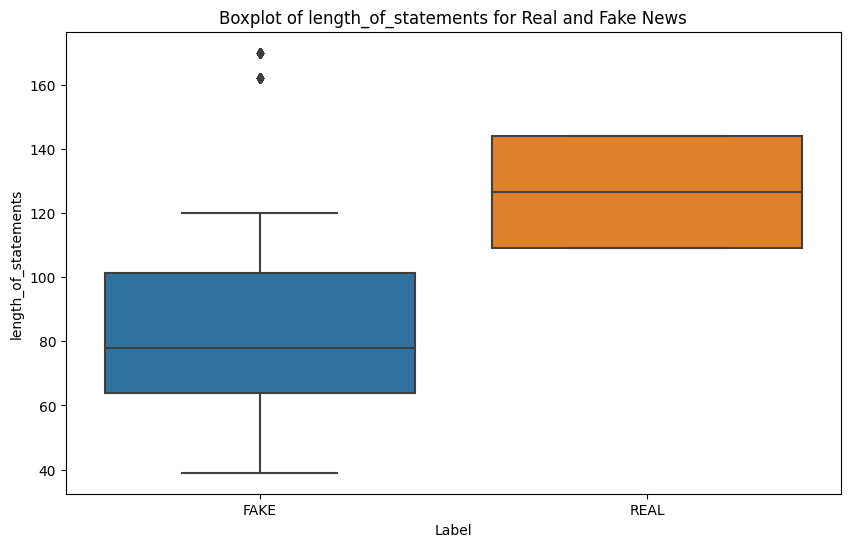

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
data = pd.read_csv('political_fact_checker.csv')

# Replace 'length_of_statements' with the actual column name you want to visualize
variable_to_visualize = 'length_of_statements'

# Create a new column for the length of statements
data['length_of_statements'] = data['statement'].apply(len)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BinaryTarget', y=variable_to_visualize, data=data)
plt.title(f'Boxplot of {variable_to_visualize} for Real and Fake News')
plt.xlabel('Label')
plt.ylabel(variable_to_visualize)
plt.show()




In [17]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('political_fact_checker.csv')

# Assuming your CSV file has columns 'BinaryNumTarget' (actual labels) and 'BinaryNumTarget' (predicted labels)
actual_labels = data['BinaryNumTarget']
predicted_labels = data['BinaryNumTarget']

# Calculate True Positive (TP) and False Positive (FP)
TP = sum((actual_labels == 1) & (predicted_labels == 1))
FP = sum((actual_labels == 0) & (predicted_labels == 1))

# Check if TP + FP is not zero before calculating Precision
if TP + FP != 0:
    # Calculate Precision
    precision = TP / (TP + FP)
    print("Precision:", precision)
else:
    print("Precision cannot be calculated because TP + FP is zero.")


Precision: 1.0


In [18]:
from sklearn.metrics import accuracy_score

# Assuming you have a ground truth dataset named 'ground_truth' with columns 'BinaryNumTarget'
# Replace 'ground_truth.csv' with the actual file path if needed
ground_truth = pd.read_csv('political_fact_checker.csv')

# Merge the predicted labels with the ground truth based on the index
merged_data = pd.merge(data, ground_truth, left_index=True, right_index=True)

# Extract the actual and predicted labels
actual_labels = merged_data['BinaryNumTarget_x']
predicted_labels = merged_data['BinaryNumTarget_y']

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


In [19]:
print(data.columns)




Index(['Unnamed: 0', 'author', 'statement', 'source', 'date', 'target',
       'BinaryTarget', 'BinaryNumTarget'],
      dtype='object')


In [21]:
from flask import Flask
import pandas as pd

app = Flask(__name__)

# Load the CSV file
data = pd.read_csv('political_fact_checker.csv')

@app.route('/')
def index():
    html_output = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Political Fact Checker</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
                background-color: #f5f5f5;
                color: #333;
            }
            h1 {
                text-align: center;
                color: #007bff;
                margin-bottom: 20px;
            }
            table {
                border-collapse: collapse;
                width: 100%;
                background-color: #fff;
                border-radius: 5px;
                overflow: hidden;
                box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            }
            th, td {
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }
            th {
                background-color: #007bff;
                color: #fff;
            }
            tr:nth-child(even) {
                background-color: #f2f2f2;
            }
            tr:hover {
                background-color: #ddd;
            }
        </style>
    </head>
    <body>

    <h1>Political Fact Checker</h1>

    <table>
        <thead>
            <tr>
                <th>Author</th>
                <th>Statement</th>
                <th>Source</th>
                <th>Date</th>
                <th>Target</th>
            </tr>
        </thead>
        <tbody>
    """

    # Iterate over rows in the DataFrame and add them to the HTML output
    for _, row in data.iterrows():
        html_output += """
            <tr>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
                <td>{}</td>
            </tr>
        """.format(row['author'], row['statement'], row['source'], row['date'], row['target'])

    html_output += """
        </tbody>
    </table>

    </body>
    </html>
    """
    
    return html_output

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [31/Mar/2024 21:52:16] "GET / HTTP/1.1" 200 -
